# Results

In this chapter the research questions from the beginng are answered on the basis of the insights gained in the previous chapters.

## Which topics are dominant in the comments section below the videos?

To answer this question, the LDA topic model can be used. As illustrated in the corresponding chapter, the best results were achieved by the model that learned 10 topics. Below we can see again the wordcloud for the model with 10 topics, which was used to identify the individual topics. The results were mixed. In part, clear topics could be identified, but in part the topics found make little sense from a human point of view. Concrete topics that could be found were domestic politics, ukraine war, "AFD", covid and the lateral thinking movement. From the analysis with pyLDAvis, we were also able to gain the insight that the topic of domestic politics dominates a particularly large proportion of the comments.

The topics found are all related to the lateral thinking movement and thus support the thesis that the commments section is dominated by the lateral thinking movement. The dominance of the topic of domestic politics also fits in with this, as this is a topic often taken up by the lateral thinking movement. At the same time, however, it must also be taken into account that these topics have a lot of social relevance in the period under consideration. Thus, there could also be many comments on the topics, even though they were not written by lateral thinkers. Also not all topics of the model can be identified and assigned to the movement. At the same time, it is also interesting to see that a socially very relevant topic such as climate change does not appear in the topics.

## How many comments can be attributed to the lateral thinking movement?

To answer this question, the dictionary analysis is used. The analysis with the RPC-Lex dictionary showed that 345,620 comments contain terms from the dictionary, which corresponds to 85% of all comments. The examination of examples shows, however, that not all comments that had a hit can also be attributed to the lateral thinking movement. Even by increasing the number of dictionary terms found in the comment, the accuracy could not be substantially improved. This suggests that the dictionary could be too general to identify lateral thinkers comments. This assumption is supported by the fact that the paper also states that the use of the dictionary to classify such comments needs to be critically reviewed, as the main purpose of the dictionary is to distinguish between different types of comments from lateral thinkers {cite:p}`rpc_lex_dictionary`.

If this circumstance is taken into account and one considers the proportion of correct hits in the analysis of the samples, one could assume that half of all hits are correct. Based on this assumption, 172,810 comments can still be attributed to the lateral thinking movement, which corresponds to 43% of all comments. This is still a large proportion, especially considering the proportion this movement has in society.

## How dominant are right-wing comments?

This question can be answered with the help of the RPC-Lex dictionary categories. The dictionary contains two categories that can be considered right-wing oriented: Anti-immigration/Islamophobia and Nationalism. To answer the questions the results from the dictionary are loaded. During the analysis, it was always saved which terms were found. This is now used to see how many of these terms can be assigned to the two categories Anti-immigration/Islamophobia and Nationalism.

To do this, first the results and the dictionary are loaded. Then a set is created, which contains only the terms of these two categories. This set contains 2,377 terms and is therefore much smaller than the complete dictionary. Afterwards we iterate over all comments to see how many of the previously found dictionary terms can be found in this reduced set of right-wing terms. The result is that 296960 comments contain right-wing terms.


In [1]:
from IPython.core.display_functions import display
import pandas as pd
from ast import  literal_eval
comments_df = pd.read_csv("data/dictionary_analysis.csv")
comments_df = comments_df.drop(columns=comments_df.columns[0], axis=1)
rpx_dict = pd.read_csv("dictionary_analysis/rpc_lex.csv", delimiter=";")
rpx_dict_nat = rpx_dict[rpx_dict.category_code == "NAT"]
rpx_dict_isla = rpx_dict[rpx_dict.category_code == "ISLA"]

right_wing_terms = set(rpx_dict_nat.term.to_list()).union(rpx_dict_isla.term.to_list())
print(len(right_wing_terms))

dict_right_wing_term_occurrence_list = []
comments_df.dict_identified_terms_list = comments_df.dict_identified_terms_list.apply(lambda x: literal_eval(x))
for term_list in comments_df.dict_identified_terms_list.to_list():
    term_occurrence = 0
    for index, term in enumerate(term_list):
        if term in right_wing_terms:
            term_occurrence += 1
    dict_right_wing_term_occurrence_list.append(term_occurrence)
    term_occurrence = 0

comments_df["right_wing_term_occurence"] = dict_right_wing_term_occurrence_list
display(comments_df.loc[comments_df['right_wing_term_occurence'] > 0])

2377


,Comments,dict_term_occurrence,dict_identified_terms_list,right_wing_term_occurence
0,wollt ihr jetzt jeden tag einen großen bericht...,7,"[ganz, großen, bericht, schön, panzer, sinnlos...",4
1,"wenn scholz alles besser weiss, wieso braucht ...",3,"[braucht, wieso, besser]",3
2,die grünen hatten früher das peace zeichen als...,9,"[grünen, heute, militär, panzer, wächst, frühe...",3
3,der westen ist ein kriegstreiber bis es zu ein...,6,"[kommt, lange, idioten, kriegstreiber, westen,...",4
4,frieden schaffen ohne waffen.,2,"[schaffen, frieden]",2
...,...,...,...,...
401274,88 kommentare --- schnell die flucht ergreifen...,4,"[schnell, 88, kommentare, flucht]",4
401276,"was die union wieder will, die leute sind doch...",10,"[land, leute, sollen, sowieso, wäre, brauchen,...",7
401277,"kann jeder deutscher werden ,kein problem sola...",9,"[gehen, deutsche, überwacht, irgendwelche, arb...",5
401278,dann nimm die leute bei dir auf und verpflege ...,1,[leute],1


This result is rather surprising, since only one fifth of the dictionary words were used while the number of hits decreased by only about 15%. If we again take into account that there are a large number of false positives, the overall large proportion of hits nevertheless leads to the conclusion that right-wing oriented comments have a relatively strong dominance.


## What is the general sentiment in the comments section?

The sentiment analysis has shown that the comments section under videos of the "tagesschau" channel is strongly negative. Only very few comments were positive and most comments were neutral or negative, with the negative comments making up the largest proportion. In view of the terms and comments observed in the previous analyses, this result was to be expected.

(0.0, 0.65)

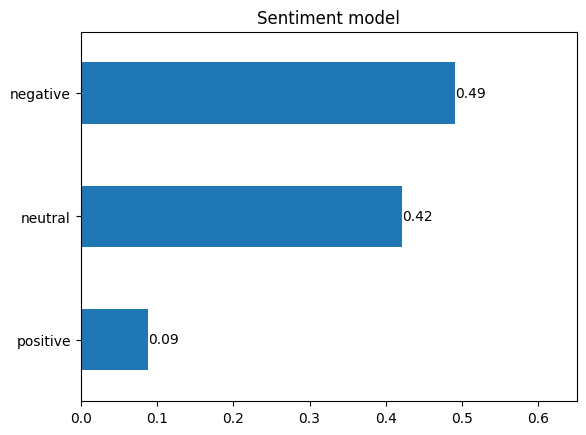

In [31]:
import pandas as pd
comments_df = pd.read_csv("data/sentiments.csv")
ax = comments_df["sentiment"].value_counts(normalize=True).sort_values().plot(kind="barh", title="Sentiment model")
ax.bar_label(ax.containers[0], fmt="%.2f")
ax.set_xlim(0,0.65)

## Do the comments of lateral thinkers make up the majority of all comments?

This question is difficult to answer with the help of the topic model, since domestic topics make up a large part of it and this topic cannot be assigned directly to lateral thinking movement. The dictionary analysis, on the other hand, allows the conclusion that lateral thinkers write many comments and dominate the comments section, at least partially. The negative sentiment revealed by the sentiment analysis supports this assumption. Furthermore, the analysis of political orientation can be used to answer this question. Most of the comments can be assigned to the conservative or extreme direction, as it has already been mentioned in the chapter before. The distribution among the parties is very different from the current polls[^forsa], which is why this result also supports the assumption that comments by lateral thinkers make up a large proportion.

[^forsa]: see https://dawum.de/Bundestag/Forsa/2023-01-24/


(0.0, 0.5)

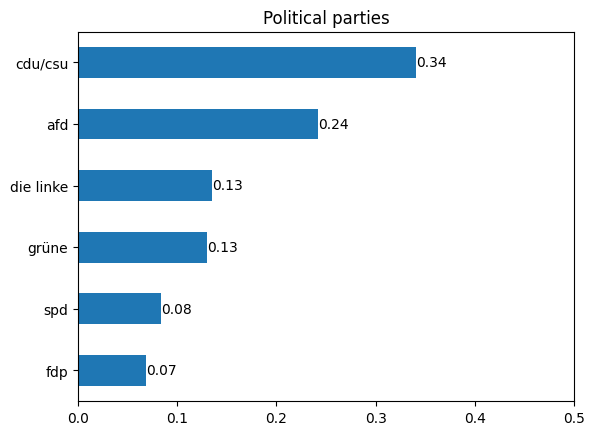

In [33]:
import pandas as pd
comments_df = pd.read_csv("data/political_parties.csv")
ax = comments_df["political_party"].value_counts(normalize=True).sort_values().plot(kind="barh", title="Political parties")
ax.bar_label(ax.containers[0], fmt="%.2f")
ax.set_xlim(0,0.5)

## Result validity

The results presented here are only valid for the dataset used. With 500 videos, a large number of videos were included and analysed, but it cannot be guaranteed that the results can be applied with certainty to the entire channel or all 8 p.m. videos of the "tagesschau" channel. Furthermore, all the methods used had their limitations, which were explained in the previous sections. These limitations also influence the validity of the results.

To check the validity of the dictionary analysis, the average number of hits in the dictionary is considered. The average number of hits is 5.3 if only comments with at least one dictionary term are taken into account. This does not seem to be a bad value, but it must also be taken into account that the dictionary contains many words. With regard to the average comment length, which was considered at the beginning, this value rather confirms that the results can be used taking into account that false positives are included.

In [9]:
comments_df = pd.read_csv("data/dictionary_analysis.csv")
comments_df.loc[comments_df['dict_term_occurrence'] > 0].dict_term_occurrence.mean()

5.372461084427984

The results of the sentiment analysis look good. With an average certainty of 93%, the accuracy of the classification is quite good.

In [4]:
comments_df = pd.read_csv("data/sentiments.csv")
comments_df.sentiment_score.mean()

0.9335578913210657

When analysing the political parties, the accuracy is slightly worse with an average certainty of 88%. Considering that the model is primarily intended to classify political statements and not social media comments, this result is still good. Nevertheless, this score says that there are probably a few misclassifications as well.

In [8]:
comments_df = pd.read_csv("data/political_parties.csv")
comments_df.political_party_score.mean()

0.8885844396229461